In [1]:
from Bio import SeqIO

for sequence in SeqIO.parse("../data/raw/example_dna.fa", "fasta"):
    print("Sequence id:", sequence.id)
    print("Sequence:", sequence.seq)
    print("\n")

Sequence id: ENST00000435737.5
Sequence: ATGTTTCGCATCACCAACATTGAGTTTCTTCCCGAATACCGACAAAAGGAGTCCAGGGAATTTCTTTCAGTGTCACGGACTGTGCAGCAAGTGATAAACCTGGTTTATACAACATCTGCCTTCTCCAAATTTTATGAGCAGTCTGTTGTTGCAGATGTCAGCAACAACAAAGGCGGCCTCCTTGTCCACTTTTGGATTGTTTTTGTCATGCCACGTGCCAAAGGCCACATCTTCTGTGAAGACTGTGTTGCCGCCATCTTGAAGGACTCCATCCAGACAAGCATCATAAACCGGACCTCTGTGGGGAGCTTGCAGGGACTGGCTGTGGACATGGACTCTGTGGTACTAAATGAAGTCCTGGGGCTGACTCTCATTGTCTGGATTGACTGA


Sequence id: ENST00000419127.5
Sequence: ATGTTTCGCATCACCAACATTGAGTTTCTTCCCGAATACCGACAAAAGGAGTCCAGGGAATTTCTTTCAGTGTCACGGACTGTGCAGCAAGTGATAAACCTGGTTTATACAACATCTGCCTTCTCCAAATTTTATGAGCAGTCTGTTGTTGCAGATGTCAGCAACAACAAAGGCGGCCTCCTTGTCCACTTTTGGATTGTTTTTGTCATGCCACGTGCCAAAGGCCACATCTTCTGTGAAGACTGTGTTGCCGCCATCTTGAAGGACTCCATCCAGACAAGCATCATAAACCGGACCTCTGTGGGGAGCTTGCAGGGACTGGCTGTGGACATGGACTCTGTGGTACTAAATGACAAAGGCTGCTCTCAGTACTTCTATGCAGAGCATCTGTCTCTCCACTACCCGCTGGAGATTTCTGCAGCCTCAGGGAGGCTGATGTGTCACTTCAAGCTGGTGGCCATAGTGGGCTACCTGATTCGTCTCTCAATCAAGTCCATCCAAATCGAAGCCGACAACTGTGTCACT

# Class distribution
We analyze gene families class distribution with respect to:
- Human DNA
- Chimpanzee DNA
- Dog DNA

## Human DNA class distribution

Text(0.5, 1.0, 'Class distribution of Human DNA')

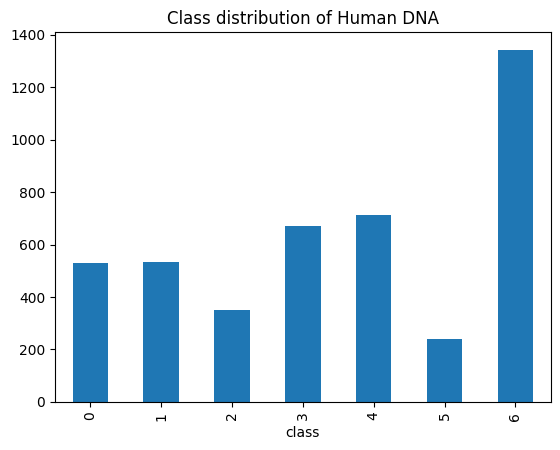

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

human_dna = pd.read_table('../data/raw/human.txt')
human_dna['class'].value_counts().sort_index().plot.bar()
plt.title("Class distribution of Human DNA")

Text(0.5, 1.0, 'Class distribution of Chimpanzee DNA')

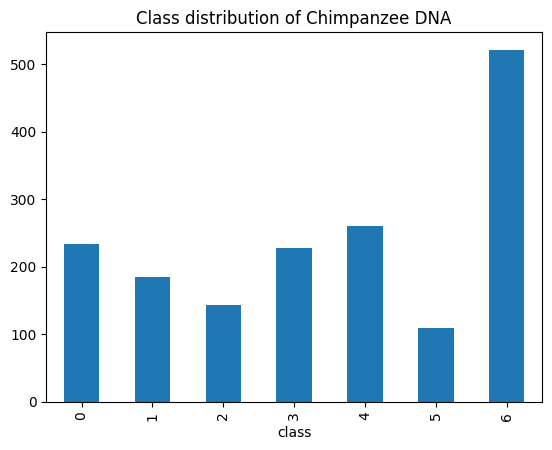

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

chimpanzee_dna = pd.read_table('../data/raw/chimpanzee.txt')
chimpanzee_dna['class'].value_counts().sort_index().plot.bar()
plt.title("Class distribution of Chimpanzee DNA")

Text(0.5, 1.0, 'Class distribution of Dog DNA')

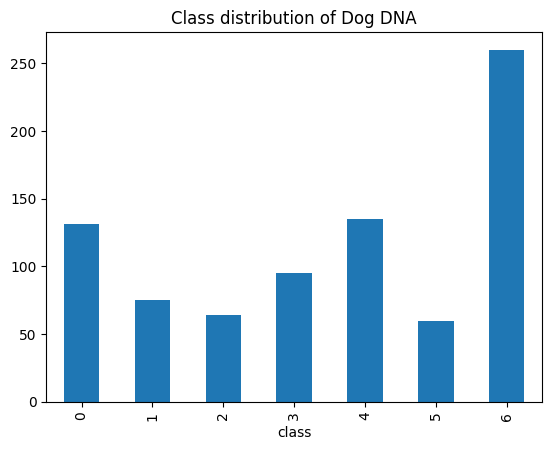

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

dog_dna = pd.read_table('../data/raw/dog.txt')
dog_dna['class'].value_counts().sort_index().plot.bar()
plt.title("Class distribution of Dog DNA")

In [5]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import euclidean, cosine
from scipy.stats import entropy

# Carica i dati
human_dna = pd.read_table('../data/raw/human.txt')
chimpanzee_dna = pd.read_table('../data/raw/chimpanzee.txt')
dog_dna = pd.read_table('../data/raw/dog.txt')

# Conta le classi
human_counts = human_dna['class'].value_counts().sort_index()
chimpanzee_counts = chimpanzee_dna['class'].value_counts().sort_index()
dog_counts = dog_dna['class'].value_counts().sort_index()

# Allinea gli indici (aggiungi classi mancanti con valore 0)
human_counts, chimpanzee_counts = human_counts.align(chimpanzee_counts, fill_value=0)
human_counts, dog_counts = human_counts.align(dog_counts, fill_value=0)
chimpanzee_counts, dog_counts = chimpanzee_counts.align(dog_counts, fill_value=0)

# Convertili in array numpy
human_array = human_counts.values
chimpanzee_array = chimpanzee_counts.values
dog_array = dog_counts.values

# Calcola le distanze
results = {}

# Pairwise comparisons
pairs = [
    ("Human vs Chimpanzee", human_array, chimpanzee_array),
    ("Human vs Dog", human_array, dog_array),
    ("Chimpanzee vs Dog", chimpanzee_array, dog_array),
]

for name, array1, array2 in pairs:
    euclidean_distance = euclidean(array1, array2)
    cosine_distance = cosine(array1, array2)
    kl_divergence = entropy(array1 + 1e-10, array2 + 1e-10)
    
    results[name] = {
        "Euclidean Distance": round(euclidean_distance, 3),
        "Cosine Distance": round(cosine_distance, 3),
        "KL Divergence": round(kl_divergence, 3),
    }

# Stampa i risultati
for name, metrics in results.items():
    print(f"Comparison: {name}")
    print(f"  Euclidean Distance: {metrics['Euclidean Distance']}")
    print(f"  Cosine Distance: {metrics['Cosine Distance']}")
    print(f"  KL Divergence: {metrics['KL Divergence']}")
    print()

Comparison: Human vs Chimpanzee
  Euclidean Distance: 1159.533
  Cosine Distance: 0.003
  KL Divergence: 0.004

Comparison: Human vs Dog
  Euclidean Distance: 1523.778
  Cosine Distance: 0.012
  KL Divergence: 0.018

Comparison: Chimpanzee vs Dog
  Euclidean Distance: 364.96
  Cosine Distance: 0.004
  KL Divergence: 0.006



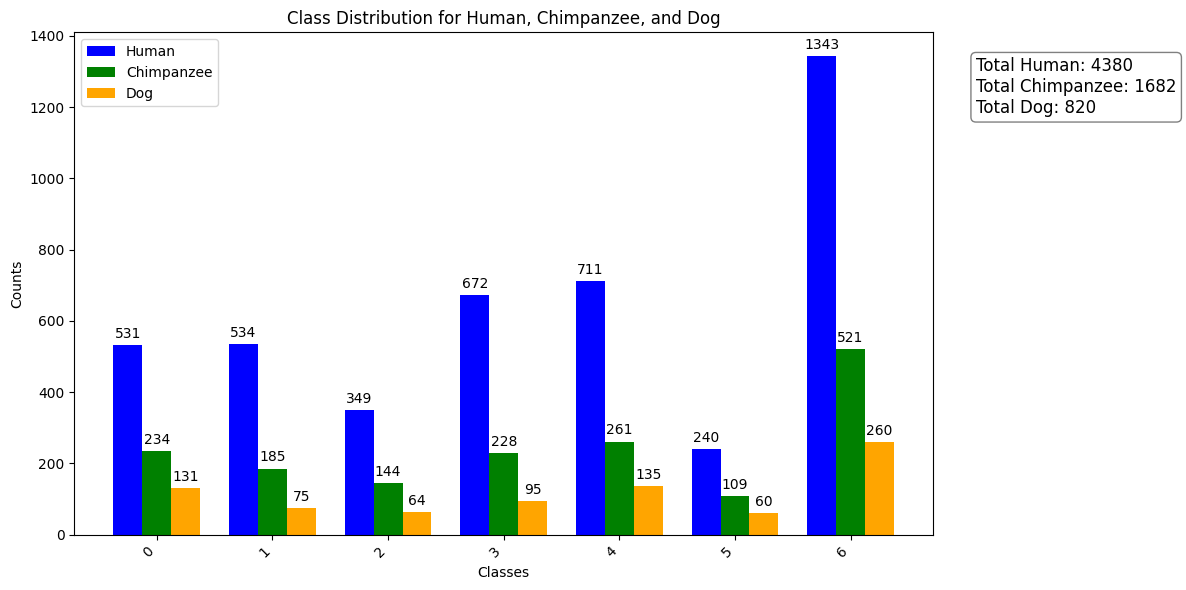

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Prepara i dati per il grafico
classes = human_counts.index  # Classi (ascisse)
human_values = human_counts.values
chimpanzee_values = chimpanzee_counts.values
dog_values = dog_counts.values

# Calcola i totali
total_human = human_values.sum()
total_chimpanzee = chimpanzee_values.sum()
total_dog = dog_values.sum()

# Parametri per il grafico
x = np.arange(len(classes))  # Indici delle classi
width = 0.25  # Larghezza delle barre

# Crea la figura e gli assi
fig, ax = plt.subplots(figsize=(12, 6))

# Aggiungi le barre
bar1 = ax.bar(x - width, human_values, width, label='Human', color='blue')
bar2 = ax.bar(x, chimpanzee_values, width, label='Chimpanzee', color='green')
bar3 = ax.bar(x + width, dog_values, width, label='Dog', color='orange')

# Personalizza il grafico
ax.set_xlabel('Classes')
ax.set_ylabel('Counts')
ax.set_title('Class Distribution for Human, Chimpanzee, and Dog')
ax.set_xticks(x)
ax.set_xticklabels(classes, rotation=45, ha='right')
ax.legend()

# Aggiungi i valori sopra le barre
for bars in [bar1, bar2, bar3]:
    for bar in bars:
        height = bar.get_height()
        if height > 0:  # Mostra solo i valori > 0
            ax.annotate(f'{int(height)}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # Offset
                        textcoords="offset points",
                        ha='center', va='bottom')

# Mostra i totali sopra il grafico
total_text = (
    f'Total Human: {total_human}\n'
    f'Total Chimpanzee: {total_chimpanzee}\n'
    f'Total Dog: {total_dog}'
)
ax.text(1.05, 0.95, total_text, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=dict(boxstyle="round", facecolor="white", edgecolor="gray"))

# Mostra il grafico
plt.tight_layout()
plt.show()

# $k$-mers feature extraction
Le sequenze di DNA e proteine possono essere viste come il "linguaggio della vita". Questo linguaggio codifica istruzioni e funzioni per le molecole presenti in tutti gli esseri viventi. La somiglianza con un linguaggio continua con il genoma che può essere considerato come un libro, le sottosequenze (geni e famiglie geniche) come frasi e capitoli, i $k$-mer e i peptidi come parole, e le basi nucleotidiche e gli amminoacidi come alfabeti. Poiché questa relazione sembra così evidente, è logico pensare che l’elaborazione del linguaggio naturale (NLP) possa essere applicata anche al linguaggio naturale delle sequenze di DNA e proteine.

Il metodo che utilizziamo qui è gestibile e semplice. Prendiamo prima la lunga sequenza biologica e la suddividiamo in "parole" sovrapposte di lunghezza $k$. Ad esempio, se utilizziamo "parole" di lunghezza 6 (esametri), "ATGCATGCA" diventa: "ATGCAT", "TGCATG", ‘GCATGC’, "CATGCA". Pertanto, la nostra sequenza di esempio è suddivisa in 4 parole esametriche.

In genomica, ci riferiamo a questo tipo di manipolazioni come "conteggio dei $k$-mer", ovvero il conteggio delle occorrenze di ciascuna possibile sottosequenza lunga $k$.

In [7]:
def get_kmers(sequence, k):
    if len(sequence) < k:
        raise ValueError("La lunghezza della sequenza deve essere maggiore o uguale a k")    
    kmers = []
    for i in range(len(sequence) - k + 1):
        kmers.append(sequence[i:i + k])
    return kmers

def join_kmers(kmers):
    return ' '.join(kmers)

# Esempio di utilizzo
sequence = "ATGCATGCA"
k = 6
kmers = get_kmers(sequence, k)
joined_kmers = join_kmers(kmers)

print("Sequenza originale:", sequence)
print("k-mers:", kmers)
print("k-mers uniti in frase:", joined_kmers)

Sequenza originale: ATGCATGCA
k-mers: ['ATGCAT', 'TGCATG', 'GCATGC', 'CATGCA']
k-mers uniti in frase: ATGCAT TGCATG GCATGC CATGCA


In [8]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

def kmer_bow_representation(kmers):
    vectorizer = CountVectorizer(lowercase=False)
    kmers_joined = join_kmers(kmers)
    bow_representation = vectorizer.fit_transform([kmers_joined])
    bow_df = pd.DataFrame(bow_representation.toarray(), columns=vectorizer.get_feature_names_out())
    return bow_df

# Esempio di utilizzo
bag_of_word_df = kmer_bow_representation(kmers)

# Per stampare senza l'indice
print(bag_of_word_df.to_string(index=False))

 ATGCAT  CATGCA  GCATGC  TGCATG
      1       1       1       1


## Carichiamo il DNA umano e determiniamo i $k$-mers

In [9]:
import pandas as pd

# Carica il DataFrame
human_dna = pd.read_table('../data/raw/human.txt')
print(human_dna)

                                               sequence  class
0     ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...      4
1     ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...      4
2     ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...      3
3     ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...      3
4     ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...      3
...                                                 ...    ...
4375  ATGGAAGATTTGGAGGAAACATTATTTGAAGAATTTGAAAACTATT...      0
4376  ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...      6
4377  ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...      6
4378  ATGGGGCACCTGGTTTGCTGTCTGTGTGGCAAGTGGGCCAGTTACC...      6
4379  ATGCAGTCCTTTCGGGAGCAAAGCAGTTACCACGGAAACCAGCAAA...      6

[4380 rows x 2 columns]


In [10]:
import pandas as pd

def get_kmers(sequence, k):
    if len(sequence) < k:
        print(sequence)
        print(len(sequence), "<", k)
        # raise ValueError("La lunghezza della sequenza deve essere maggiore o uguale a k")    
    kmers = []
    for i in range(len(sequence) - k + 1):
        kmers.append(sequence[i:i + k])
    return kmers

def join_kmers(kmers):
    return ' '.join(kmers)

# Carica il DataFrame
human_dna = pd.read_table('../data/raw/human.txt')

# Estrai i k-mers per ogni sequenza
k = 6
human_dna['k-mers'] = human_dna.apply(lambda x: get_kmers(x['sequence'], k), axis=1)

# Unisci i k-mers in una singola stringa per ogni riga
human_dna['joined-kmers'] = human_dna['k-mers'].apply(join_kmers)

# Rimuovi la colonna 'sequence' e 'k-mers' se non necessarie
human_dna = human_dna.drop(['sequence', 'k-mers'], axis=1)

# Riordina le colonne per avere 'joined-kmers' come prima e 'class' come seconda
human_dna = human_dna[['joined-kmers', 'class']]

# Stampa il DataFrame risultante
print(human_dna)

ATGGA
5 < 6
                                           joined-kmers  class
0     ATGCCC TGCCCC GCCCCA CCCCAA CCCAAC CCAACT CAAC...      4
1     ATGAAC TGAACG GAACGA AACGAA ACGAAA CGAAAA GAAA...      4
2     ATGTGT TGTGTG GTGTGG TGTGGC GTGGCA TGGCAT GGCA...      3
3     ATGTGT TGTGTG GTGTGG TGTGGC GTGGCA TGGCAT GGCA...      3
4     ATGCAA TGCAAC GCAACA CAACAG AACAGC ACAGCA CAGC...      3
...                                                 ...    ...
4375  ATGGAA TGGAAG GGAAGA GAAGAT AAGATT AGATTT GATT...      0
4376  ATGCAG TGCAGT GCAGTC CAGTCC AGTCCT GTCCTT TCCT...      6
4377  ATGCAG TGCAGT GCAGTC CAGTCC AGTCCT GTCCTT TCCT...      6
4378  ATGGGG TGGGGC GGGGCA GGGCAC GGCACC GCACCT CACC...      6
4379  ATGCAG TGCAGT GCAGTC CAGTCC AGTCCT GTCCTT TCCT...      6

[4380 rows x 2 columns]


In [11]:
human_texts = human_dna['joined-kmers']
y_human = human_dna.iloc[:, 1].values
print(human_texts)
print(y_human)

0       ATGCCC TGCCCC GCCCCA CCCCAA CCCAAC CCAACT CAAC...
1       ATGAAC TGAACG GAACGA AACGAA ACGAAA CGAAAA GAAA...
2       ATGTGT TGTGTG GTGTGG TGTGGC GTGGCA TGGCAT GGCA...
3       ATGTGT TGTGTG GTGTGG TGTGGC GTGGCA TGGCAT GGCA...
4       ATGCAA TGCAAC GCAACA CAACAG AACAGC ACAGCA CAGC...
                              ...                        
4375    ATGGAA TGGAAG GGAAGA GAAGAT AAGATT AGATTT GATT...
4376    ATGCAG TGCAGT GCAGTC CAGTCC AGTCCT GTCCTT TCCT...
4377    ATGCAG TGCAGT GCAGTC CAGTCC AGTCCT GTCCTT TCCT...
4378    ATGGGG TGGGGC GGGGCA GGGCAC GGCACC GCACCT CACC...
4379    ATGCAG TGCAGT GCAGTC CAGTCC AGTCCT GTCCTT TCCT...
Name: joined-kmers, Length: 4380, dtype: object
[4 4 3 ... 6 6 6]


In [12]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(4,4)) #The n-gram size of 4 is previously determined by testing
X = cv.fit_transform(human_texts)
X

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 5406441 stored elements and shape (4380, 232414)>

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y_human, 
                                                    test_size = 0.20, 
                                                    random_state=42)

classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

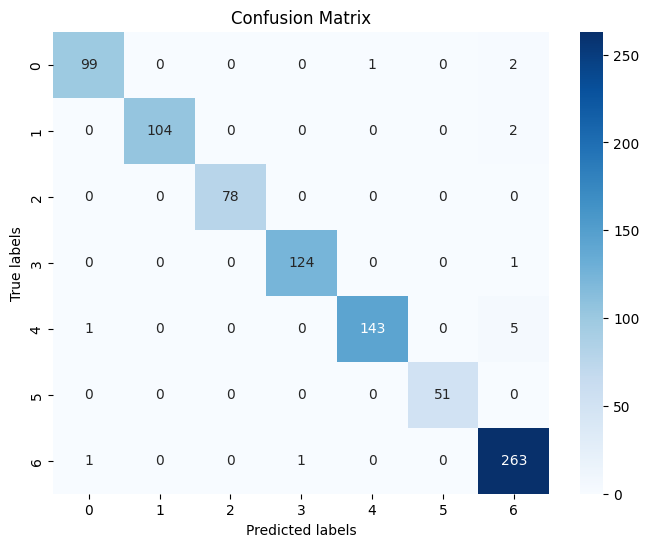

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcolare la matrice di confusione
cm = confusion_matrix(y_test, y_pred)

# Creare una heatmap per la matrice di confusione
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)

# Aggiungere etichette
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Mostrare la heatmap
plt.show()

Precision: 0.984
Recall: 0.984
Accuracy: 0.984
F1-score: 0.984


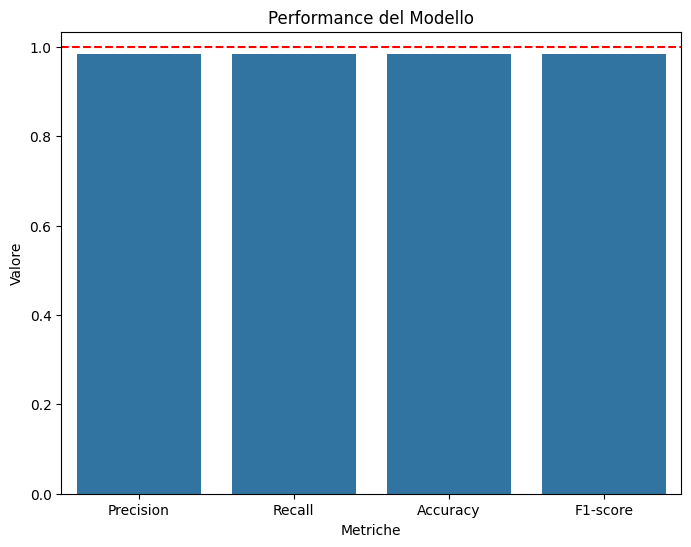

In [25]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

precision = precision_score(y_test, y_pred, average='weighted')  # 'weighted' per media ponderata
recall = recall_score(y_test, y_pred, average='weighted')  # 'weighted' per media ponderata
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # 'weighted' per media ponderata

# Stampare i risultati
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"Accuracy: {accuracy:.3f}")
print(f"F1-score: {f1:.3f}")

metrics = {'Precision': precision, 'Recall': recall, 'Accuracy': accuracy, 'F1-score': f1}

# Creare un grafico a barre
plt.figure(figsize=(8, 6))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()))

# Aggiungere etichette e titolo
plt.xlabel('Metriche')
plt.ylabel('Valore')
plt.title('Performance del Modello')

# Tracciare una linea orizzontale tratteggiata al valore 1.0
plt.axhline(y=1.0, color='r', linestyle='--')

# Mostrare il grafico
plt.show()